# Import libraries and dataset

In [ ]:
!pip install split-folders
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5tgx8ft_
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-5tgx8ft_
  Resolved https://github.com/tensorflow/docs to commit 60abeb06e500fa5edbbac374fc0d8142c8322aef
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.10.27.81990-py3-none-any.whl size=184142 sha256=ee858e0c190981f13702dfbfbf35b1f2ee63bbdc33d76710ed807deebfc9f617
  Stored in directory: /tmp/pip-ephem-wheel-cache-gegcaksz/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
# import requirement libraries and tools
import os
import pathlib
import itertools
import splitfolders
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# To enable dynamic memory allocation, run the following commands
# at the start of the session :
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [ ]:
root_path = '/content/Rice_Image_Dataset'
root_path = pathlib.Path(root_path)

# Prepare dataset



In [ ]:
splitfolders.ratio(input=root_path, output='rice_imgs', seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 75000 files [00:16, 4643.04 files/s]


In [ ]:
BATCH_SIZE = 16
# resize the images from the directories to prevent ResourceExhaustedError
IMAGE_SIZE = (150, 150)

Train = keras.utils.image_dataset_from_directory(
    directory='/content/rice_imgs/train',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Validation = keras.utils.image_dataset_from_directory(
    directory='/content/rice_imgs/val',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Test = keras.utils.image_dataset_from_directory(
    directory='/content/rice_imgs/test',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Found 52500 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.


# Model 2

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

def compile_and_fit(model, optimizer=None, max_epochs=2):
    """
    Compile model and fit model on dataset based on input model until find best epoch
        model: created model
        optimizer: defined optimizer
        max_epochs: Number of epochs
    """

    if optimizer is None:
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    # complie model before train
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    # train model
    history = model.fit(
        Train,
        epochs=max_epochs,
        validation_data=Validation,
        callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience=8),
    )

    return history

Second CNN model with more complexity to improve performance

In [ ]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=100, activation='relu'),
        tf.keras.layers.Dense(units=5),
    ]
)

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 100)               8761700   
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                        

In [ ]:
# train model_2 and store results
model_hist = compile_and_fit(model_2, max_epochs=6)

Epoch 1/6
3282/3282 [==============================] - 907s 276ms/step - loss: 0.1157 - accuracy: 0.9613 - val_loss: 0.0860 - val_accuracy: 0.9707
Epoch 2/6
3282/3282 [==============================] - 888s 271ms/step - loss: 0.0526 - accuracy: 0.9824 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 3/6
3282/3282 [==============================] - 933s 284ms/step - loss: 0.0324 - accuracy: 0.9887 - val_loss: 0.0865 - val_accuracy: 0.9765
Epoch 4/6
3282/3282 [==============================] - 860s 262ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0544 - val_accuracy: 0.9860
Epoch 5/6
3282/3282 [==============================] - 869s 265ms/step - loss: 0.0153 - accuracy: 0.9945 - val_loss: 0.0689 - val_accuracy: 0.9833
Epoch 6/6
3282/3282 [==============================] - 890s 271ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.0595 - val_accuracy: 0.9869


In [ ]:
def plot_comparision_result(model):
    """
    Plot diagram of accuracy and loss for train and validation set
        model: created model
    """

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))

    # Plot train and validation accuracy
    axs[0].plot(model.history['accuracy'], color="red", marker="o")
    axs[0].plot(model.history['val_accuracy'], color="blue", marker="h")
    axs[0].set_title('Accuracy Comparison between Train & Validation Set')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc="lower right")

    # Plot train and validation loss
    axs[1].plot(model.history['loss'], color="red", marker="o")
    axs[1].plot(model.history['val_loss'], color="blue", marker="h")
    axs[1].set_title('Loss Comparison between Train & Validation Set')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc="upper right")

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------

def get_ture_and_pred_labels(dataset, model):
    """
    Get out 2 list include y_true and y_pred for use in confusion_matrix
        dataset: dataset include images and label
        model: created model
    """

    y_true = []
    y_pred = []

    for images, labels in dataset:
        labels = labels.numpy()
        outputs = tf.nn.softmax(model(images))
        pred = tf.argmax(outputs, axis=1).numpy()
        images = images.numpy()

        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)

    return y_true, y_pred

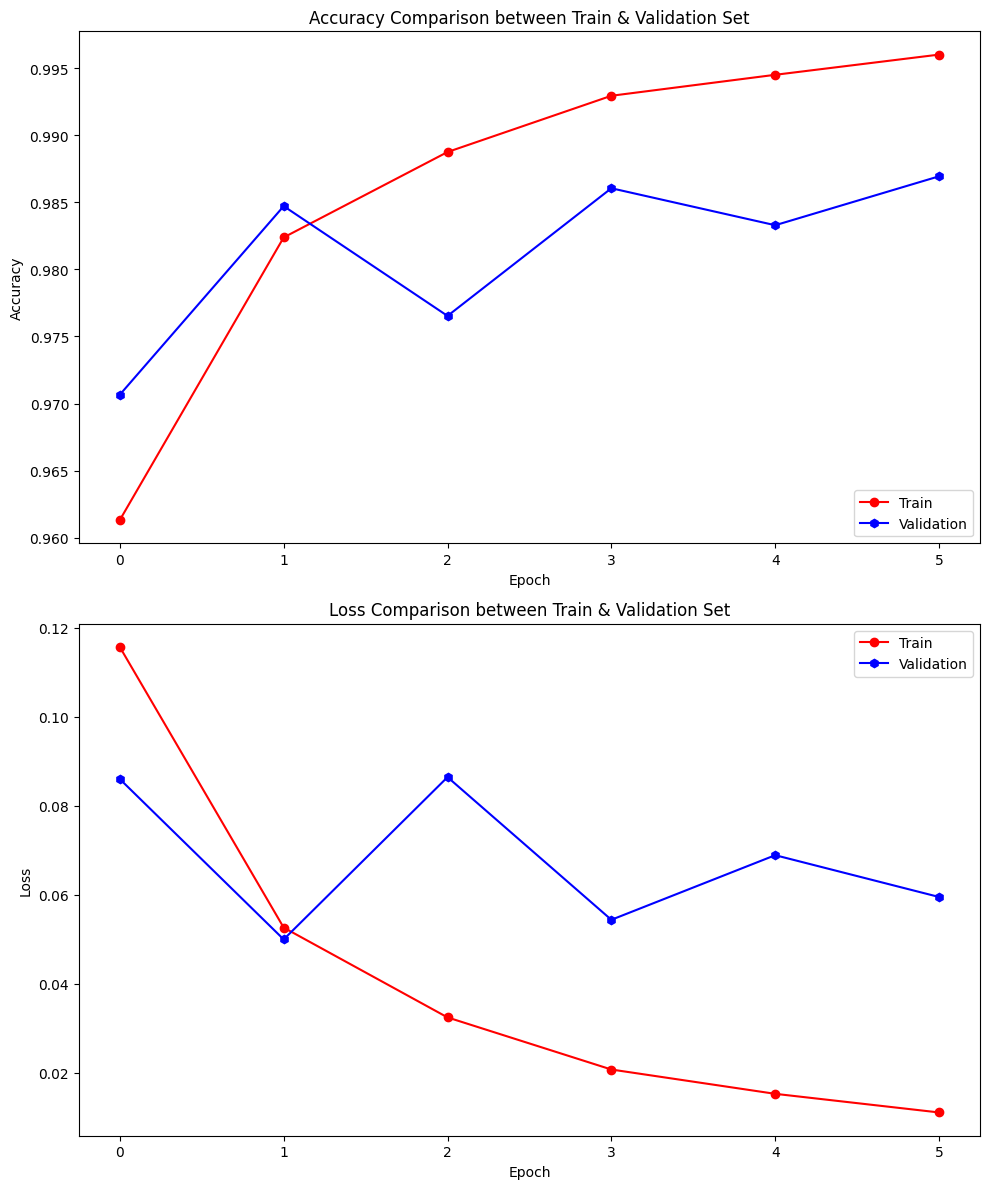

In [ ]:
plot_comparision_result(model_hist)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2250
         1.0       0.99      0.98      0.98      2250
         2.0       1.00      1.00      1.00      2250
         3.0       0.97      0.99      0.98      2250
         4.0       0.98      0.99      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250
 




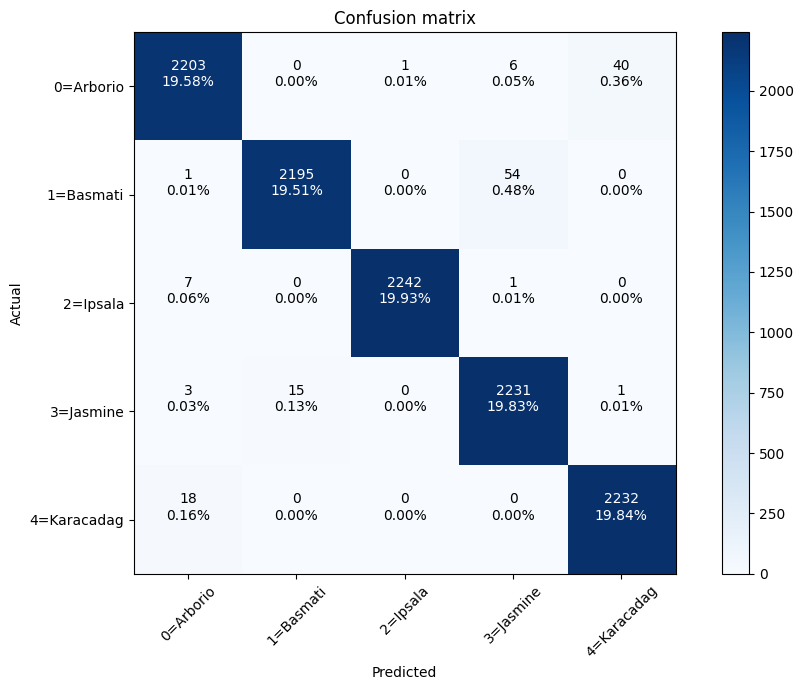

In [ ]:
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, model_2)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
model_2.save('model_2')

In [ ]:
# Evaluate Finanl model and check it
test_loss, test_acc = model_2.evaluate(Test, verbose=2)
print(f'\nTest accuracy:{test_acc} (test_loss: {test_loss})')

704/704 - 43s - loss: 0.0563 - accuracy: 0.9868 - 43s/epoch - 61ms/step

Test accuracy:0.9867555499076843 (test_loss: 0.05627114325761795)


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2250
         1.0       0.99      0.97      0.98      2250
         2.0       1.00      1.00      1.00      2250
         3.0       0.97      0.99      0.98      2250
         4.0       0.98      0.99      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250
 




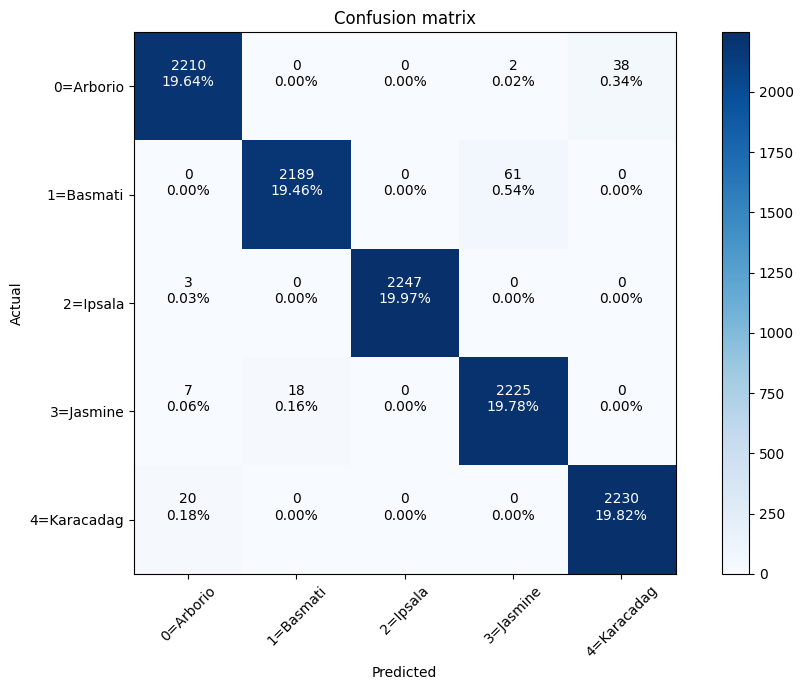

In [ ]:
y_true_test, y_pred_test = get_ture_and_pred_labels(Test, model_2)

print(classification_report(y_true_test, y_pred_test), '\n\n')
cm = confusion_matrix(y_true_test, y_pred_test)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)